### Q2 Project - Data Analysis in Python
#### Itai Komoroff 
#### Intensive Data Science 2 W/Ms. Pan
#### Started: Friday December 1 2023
#### All NBA players' 2K ratings 2014-2020
#### https://www.kaggle.com/datasets/willyiamyu/nba-2k-ratings-with-real-nba-stats

### Analyzing NBA Players' Stats & Their NBA2K (Videogame) overall ratings: 

##### My data set contains the stats of every active NBA player from 2014-2020 and their 2K rating in that year. In my project, I compare the correlation between certain statistics - for example, points per game & minutes per game - with eachother and also compare said statistics to a player's 2K rating. I utilized a bar graph, scatter plot, correlation test, and a line plot to mathematically discover the correlation between certain statistics. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("nba_rankings_2014-2020 2.csv")
df.head()

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


### Graph 1 Overview

#### The Graph below compares every NBA player from any year between 2014 and 2020's points per game and rating out of 100 they were given in said year's NBA2K video game. Through the graph's evidently very positive slope, one can infer that as a player scores more points per game, they will recieve a higher rating in 2K. Despite this high correlation, there are outliers. For example, one year, Draymond Green - a power forward for the Golden State warriors - recieved a 90 rating, which is very high. Despite this, Draymond only scored 14 points per game, which is very average and which the graph would predict an overall rating of around 79. Overall, the graph shows that there is high positive correlation between the two variables, but there remains the possibilty of outliers. 

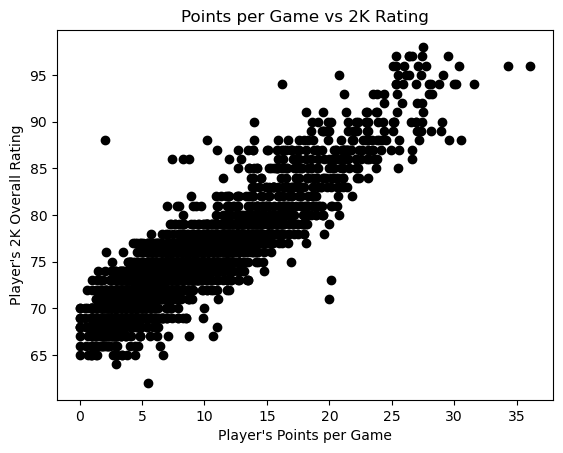

In [3]:
fig, ax = plt.subplots()
plt.scatter(df["PTS"], df["rankings"], color = "black")
ax.set_ylabel("Player's 2K Overall Rating")
ax.set_xlabel("Player's Points per Game")
ax.set_title("Points per Game vs 2K Rating")
plt.show()

In [4]:
stats.pearsonr(df["PTS"], df["rankings"])

PearsonRResult(statistic=0.8950123620446423, pvalue=0.0)

In [5]:
grouped = df.groupby("AGE")
rating = grouped.mean()["rankings"]
grouped = df.groupby("AGE")
pts = grouped.mean()["PTS"]

/var/folders/jn/455p98cd3531gyptmr9hq8m40000gp/T/ipykernel_37227/3318554821.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating = grouped.mean()["rankings"]
/var/folders/jn/455p98cd3531gyptmr9hq8m40000gp/T/ipykernel_37227/3318554821.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pts = grouped.mean()["PTS"]


### Graph 2: Subplots Overview

#### The subplots below compare an NBA player's age and their overall 2K rating, and their age and their points per game in a single season. The results from this graph are not suprising; within NBA commentary, it is commonly believed that players usually reach their peak in ages 26-30. In the subplots below, it is shown that players overall ratings are, on average, highest from age 26-30 and that players aged 26-30 score the most points per game. I believe that the subplots below breakdown and prove why and how players ages 26-30 are considered the best in the league. 

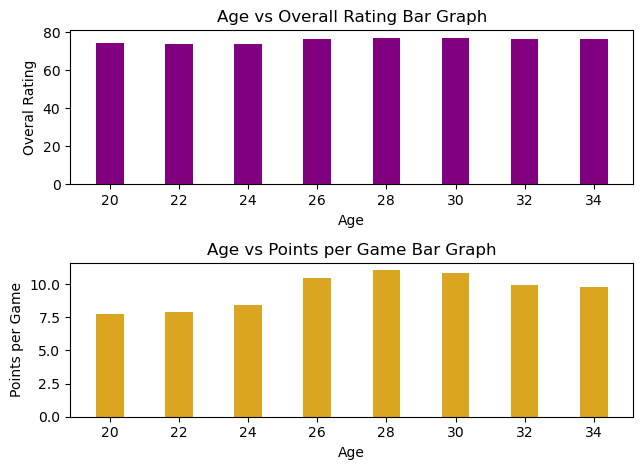

In [6]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ages = [20, 22, 24, 26, 28, 30, 32, 34]

ax1.bar(ages, rating.loc[ages], color = "purple")
ax2.bar(ages, pts.loc[ages], color = "goldenrod")

ax1.set_ylabel("Overal Rating")
ax1.set_xlabel("Age")
ax1.set_title("Age vs Overall Rating Bar Graph")
ax2.set_ylabel("Points per Game")
ax2.set_xlabel("Age")
ax2.set_title("Age vs Points per Game Bar Graph")

fig2.tight_layout()

### Graph 3: Line Plot Overview

#### The lineplot below compares the mean minutes per game of NBA players and their age. Similar to the results above, the results from the lineplot below are not suprising. The line plot below shows that as players progress into their peak (age 26-30), they begin to get more minutes per game, with players age 29 averaging nearly 25 minutes per game (maximum) and players age 40 averaging less than 17 (minimum). The results from this demonstrate again that a player's peak is usually when they are age 26-30. As a player falls out of their peak, their minutes begin to decrease. 

    AGE        MIN
0    19  16.890476
1    20  18.603030
2    21  19.350000
3    22  18.434694
4    23  18.418341
5    24  19.734000
6    25  22.267281
7    26  22.805140
8    27  23.661000
9    28  23.954118
10   29  24.125490
11   30  23.874219
12   31  24.090000
13   32  23.818750
14   33  22.419403
15   34  23.121569
16   35  22.083784
17   36  19.782609
18   37  20.272727
19   38  17.800000
20   39  19.500000
21   40  16.833333
22   41  17.700000


Text(0.5, 1.0, 'Mean Minutes per Game vs Each Age')

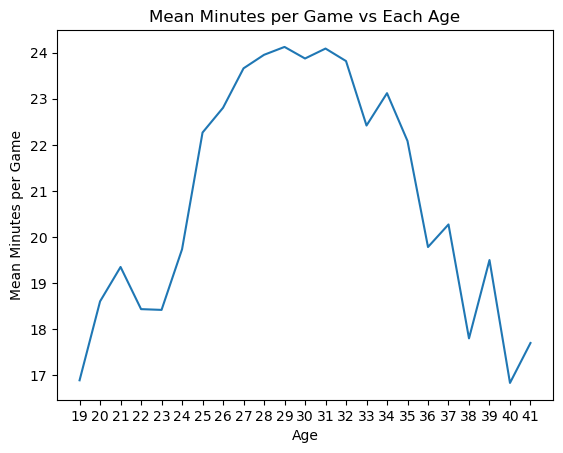

In [7]:
mean_points_per_age = df.groupby('AGE')["MIN"].mean().reset_index()

print(mean_points_per_age)

plt.plot(mean_points_per_age['AGE'], mean_points_per_age["MIN"])

plt.xticks(mean_points_per_age['AGE'])


plt.xlabel('Age')
plt.ylabel('Mean Minutes per Game')
plt.title("Mean Minutes per Game vs Each Age")



### Conclusion / Analysis


#### By creating a bar graph, scatter plot, lineplot and calculating correlation, I was able to discover that there was high correlation between a player's age, their points per game, their minutes per game, and their 2K rating. My biggest takeaway from this project was that, overall, NBA players usually reach their peak from age 26-30. I was able to deduce this conclusion because players scored the most, got the most minutes, and recieved highest 2K ratings between the 2 ages. 